In [1]:
import pathlib

import pandas as pd

from topollm.analysis.compare_sampling_methods.run_general_comparisons import filter_dataframe_based_on_filters_dict
from topollm.config_classes.constants import TOPO_LLM_REPOSITORY_BASE_PATH

Setting HYDRA_FULL_ERROR environment variable to '1'.
os.environ['HYDRA_FULL_ERROR'] = '1'


In [2]:
comparisons_folder_base_path = pathlib.Path(
    TOPO_LLM_REPOSITORY_BASE_PATH,
    "data/analysis/sample_sizes/run_general_comparisons/array_truncation_size=5000/analysis/twonn/",
)

In [4]:
root_dir = comparisons_folder_base_path

# Initialize an empty list to store dataframes
dfs = []

# Traverse the directory structure using pathlib's rglob
for file_path in root_dir.rglob(pattern="full_local_estimates_df.csv"):
    # Load the CSV file into a dataframe
    df = None

    try:
        df = pd.read_csv(filepath_or_buffer=file_path, keep_default_na=False)
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate the dataframes
if dfs:
    concatenated_df = pd.concat(dfs, ignore_index=True)
else:
    concatenated_df = pd.DataFrame()  # Empty dataframe if no files found

# Save the concatenated dataframe
output_path = pathlib.Path(root_dir, "concatenated_full_local_estimates_df.csv")
concatenated_df.to_csv(output_path, index=False)


In [17]:
concatenated_filters_dict = {
    "data_full": "data-multiwoz21_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags",
    "data_prep_sampling_method": "random",
    "deduplication": "array_deduplicator",
    "model_partial_name": "model-model-roberta-base_task-masked_lm_multiwoz21-train-10000-ner_tags_ftm-standard_lora-None_5e-05-constant-0.01-50",
    "n_neighbors": 256,
    "data_prep_sampling_samples": 100000,
}

filtered_concatenated_df = filter_dataframe_based_on_filters_dict(
    df=concatenated_df,
    filters_dict=concatenated_filters_dict,
)

filtered_concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 5390 to 6225
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   60 non-null     int64  
 1   path                         60 non-null     object 
 2   array_name                   60 non-null     object 
 3   array_data                   60 non-null     object 
 4   data_prep_sampling_method    60 non-null     object 
 5   data_prep_sampling_seed      60 non-null     int64  
 6   data_prep_sampling_samples   60 non-null     int64  
 7   local_estimates_desc_full    60 non-null     object 
 8   local_estimates_description  60 non-null     object 
 9   local_estimates_samples      60 non-null     int64  
 10  zerovec                      60 non-null     object 
 11  deduplication                60 non-null     object 
 12  model_full                   60 non-null     object 
 13  model_task            

400           Axes(0.1,0.559091;0.363636x0.340909)
14400    Axes(0.536364,0.559091;0.363636x0.340909)
31200             Axes(0.1,0.15;0.363636x0.340909)
dtype: object

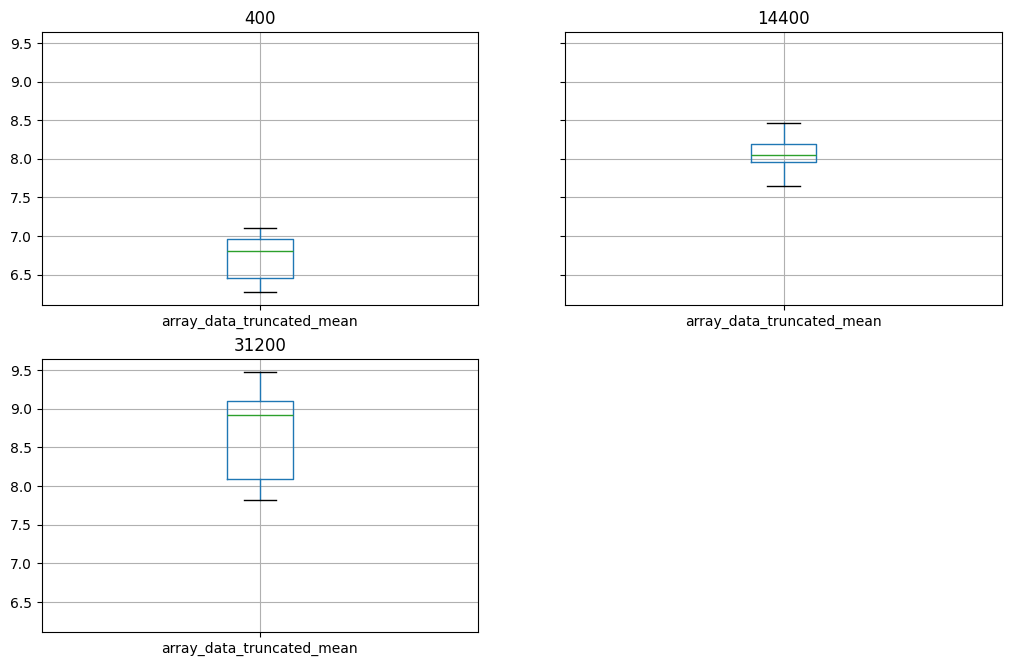

In [21]:
# Group "filtered_concatenated_df" by value in 'model_checkpoint' column
# and make a boxplot of "array_data_truncated_mean" for each group

data_grouped = filtered_concatenated_df.groupby("model_checkpoint")
data_grouped.boxplot(column="array_data_truncated_mean", figsize=(12, 8))

In [18]:
filtered_concatenated_df

,Unnamed: 0,path,array_name,array_data,data_prep_sampling_method,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_desc_full,local_estimates_description,local_estimates_samples,...,samples,feature_column,neighbors_mode,n_neighbors,num_elements,array_data_truncated,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
5390,1,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[9.54923548 6.37410072 9.8963858 ... 7.087042...,random,47,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[9.54923548 6.37410072 9.8963858 ... 7.087042...,8.010202,1.681216,8.010202,1.681216
5392,5,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[7.81286613 7.54531641 8.62085184 ... 3.932627...,random,48,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[7.81286613 7.54531641 8.62085184 ... 3.932627...,7.644480,1.623002,7.644480,1.623002
5397,15,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[8.1343761 7.41597978 7.93753704 ... 6.846984...,random,49,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[8.1343761 7.41597978 7.93753704 ... 6.846984...,7.974018,1.816569,7.974018,1.816569
5405,31,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[9.56468837 9.09961672 6.36306961 ... 7.472401...,random,46,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[9.56468837 9.09961672 6.36306961 ... 7.472401...,7.706768,1.649213,7.706768,1.649213
5410,41,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 8.07829548 7.38934616 9.23824866 ... 9.32...,random,51,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[ 8.07829548 7.38934616 9.23824866 ... 9.32...,7.952398,1.570400,7.952398,1.570400
5416,53,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 8.95911252 5.92820071 8.7016266 ... 8.59...,random,44,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[ 8.95911252 5.92820071 8.7016266 ... 8.59...,8.099635,1.647032,8.099635,1.647032
5463,117,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[ 8.22381071 8.14667975 7.7487583 ... 8.97...,random,43,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[ 8.22381071 8.14667975 7.7487583 ... 8.97...,8.460145,2.083097,8.460145,2.083097
5475,141,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[10.37835158 7.46253255 9.88790184 ... 6.23...,random,42,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[10.37835158 7.46253255 9.88790184 ... 6.23...,8.469010,1.929337,8.469010,1.929337
5485,161,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[10.04677193 7.89045899 8.29163172 ... 7.07...,random,45,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[10.04677193 7.89045899 8.29163172 ... 7.07...,8.193192,1.733099,8.193192,1.733099
5490,171,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[4.94423812 8.32357521 8.91111132 ... 9.440184...,random,50,100000,desc-twonn_samples-2500_zerovec-keep_dedup-arr...,twonn,2500,...,3000,ner_tags,absolute,256.0,2500,[4.94423812 8.32357521 8.91111132 ... 9.440184...,8.155855,1.740481,8.155855,1.740481


In [20]:
filtered_concatenated_df["model_partial_name"].unique()

array(['model-model-roberta-base_task-masked_lm_multiwoz21-train-10000-ner_tags_ftm-standard_lora-None_5e-05-constant-0.01-50'],
      dtype=object)

In [3]:
data_folder_list: list[str] = [
    "data-multiwoz21_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-multiwoz21_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-multiwoz21_split-test_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
]

model_folder_list: list[str] = [
    "model-roberta-base_task-masked_lm/",
]

selected_data_folder = data_folder_list[4]
selected_model_folder = model_folder_list[0]

file_path = pathlib.Path(
    comparisons_folder_base_path,
    selected_data_folder,
    "lvl-token/add-prefix-space-True_max-len-512/",
    selected_model_folder,
    "layer--1_agg-mean/norm-None/",
    "full_local_estimates_df.csv",
)

results_base_directory_path: pathlib.Path = file_path.parent

local_estimates_df: pd.DataFrame = pd.read_csv(
    filepath_or_buffer=file_path,
)

# Select a subset of the data with the same parameters.
# This allows comparing over different seeds.
#
# We do not fix the local_estimates_samples,
# since we want to compare the results for different sample sizes.

filters_dict = {
    "data_prep_sampling_method": "random",
    "deduplication": "array_deduplicator",
    "n_neighbors": 128,
    "data_prep_sampling_samples": 50000,
}

subset_local_estimates_df = filter_dataframe_based_on_filters_dict(df=local_estimates_df, filters_dict=filters_dict)

subset_local_estimates_df.describe()

,Unnamed: 0,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_samples,n_neighbors,num_elements,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
count,200.000000,200.000000,200.0,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,608.150000,51.500000,50000.0,27500.000000,128.0,27432.185000,13.268248,4.112009,13.271778,4.115072
std,330.240551,5.780751,0.0,14397.445335,0.0,14291.993163,0.475969,0.324772,0.478492,0.332824
min,95.000000,42.000000,50000.0,5000.000000,128.0,5000.000000,12.557652,3.090839,12.565677,3.090839
25%,275.000000,46.750000,50000.0,15000.000000,128.0,15000.000000,12.916593,4.021203,12.915199,3.992495
50%,656.000000,51.500000,50000.0,27500.000000,128.0,27500.000000,13.165960,4.221504,13.180874,4.213067
75%,830.500000,56.250000,50000.0,40000.000000,128.0,40000.000000,13.541943,4.317664,13.558237,4.321614
max,1113.000000,61.000000,50000.0,50000.000000,128.0,49365.000000,15.256311,4.653293,15.256311,4.700982
